In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import datetime
from datetime import date,datetime
import re

In [85]:
import os

In [86]:
os.getcwd()

'C:\\Tools 20\\DATA science\\PYTHON\\Hackathon'

In [87]:
os.chdir('C:\Tools 20\DATA science\PYTHON\Hackathon')

In [88]:
#Defining all dataframes
df_PA = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Patients")
df_EDV = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "EDVisits")
df_AV = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "AmbulatoryVisits")
df_RR = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "ReAdmissionRegistry")
df_D = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Discharges")
df_P = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Providers")
dfEDU = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "EDUnique")

1.Make a pair plot on Readmission Registry table & do u see any correlation between columns values.


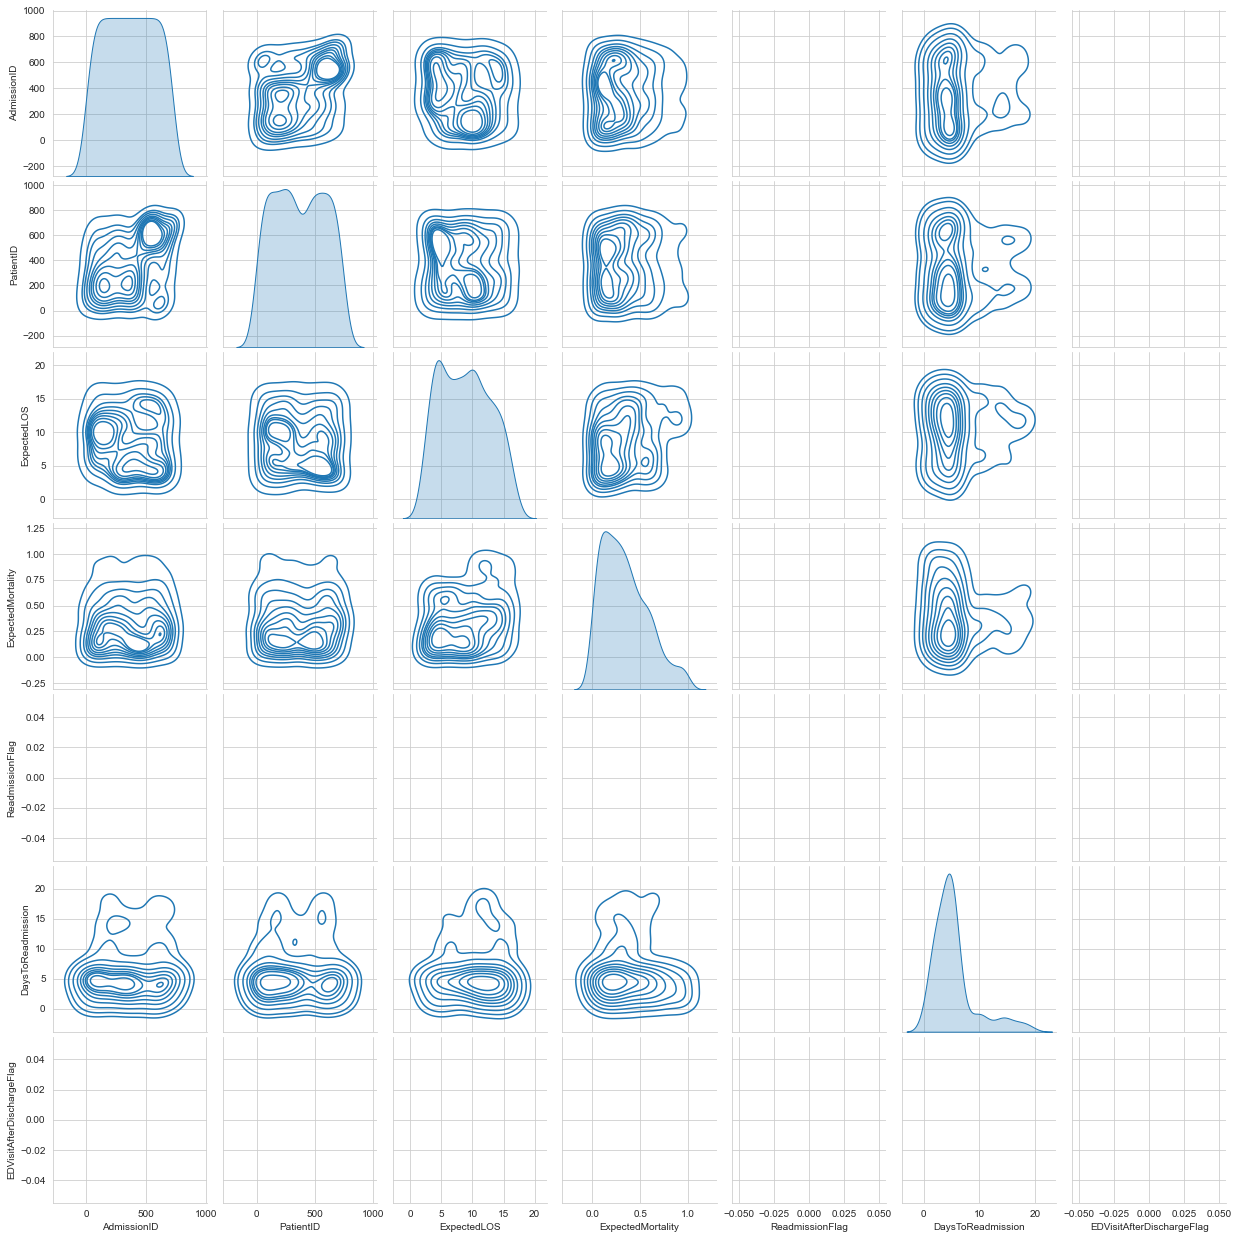

In [89]:
g=sns.pairplot(df_RR,kind="kde",diag_kind="auto",palette="husl",height=2.5)
                       #pairplot using seaborn module
                                                #kind : Kind of plot for the non-identity relationships. {‘scatter’, ‘reg’}
  #diag_kind : Kind of plot for the diagonal subplots. {‘hist’, ‘kde’,'auto'-based on hue used or not }
  #palette :set of colors for mapping the hue variable.
    

No correlation between column values is observed .

2. Using iloc, retrieve the firstname and lastname of patients between indices 101 and 200.

In [90]:
firstname=df_PA.FirstName.iloc[101:201]     #pandas.DataFrame.iloc[row, column]
lastname=df_PA.LastName.iloc[101:201]         #index positions 101 to 201
for N in range(101,201):
    print("%d  %s  %s" %(N,firstname[N],lastname[N]))        #%d is of datatype interger , %s is of data type float

101  Gipsy  Frankton
102  Jethro  Wharin
103  Viv  Aylward
104  Swift  Dreschler
105  Fadel  Jacquemard
106  Myrtia  Pow
107  Damian  Anthill
108  Christiano  Bonhan
109  Jewel  Philipsson
110  Devlin  Stonehewer
111  Kellen  Bonhan
112  Shaine  MacLeod
113  Swift  Breagan
114  Zonnya  Frankton
115  Gerhold  Inc
116  Blondie  Inc
117  Kristofer  Scupham
118  Tann  Murcutt
119  Shaine  Tuson
120  Granny  Prandoni
121  Hilll  Nock
122  Pollyanna  Mochan
123  Lucila  McGrann
124  Mia  Inc
125  Zonnya  Machon
126  Blondie  Inc
127  Fadel  Maseres
128  Gerhold  Kneath
129  Lanni  Angear
130  Richy  McGrann
131  Christiano  Matevosian
132  Cally  Group
133  Borer  Stonehewer
134  Cally  Aylward
135  Gabriel  Walkden
136  Shaine  Machon
137  Damian  Maseres
138  Richy  Inc
139  Cilka  Inc
140  Daugherty  D'Ambrogi
141  Rourke  Mateiko
142  Damian  Tuson
143  Erik  Roughley
144  Sheena  LLC
145  Borer  Roughley
146  Borer  Polini
147  Sheena  McGrann
148  Daugherty  Murcutt
149  Erik  Mateiko


3."Create a figure object called fig using plt.figure() **
 ** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. **
 ** Plot (x,y) on that axes and set the labels.
 Note : You can plot on any x,y set of values."


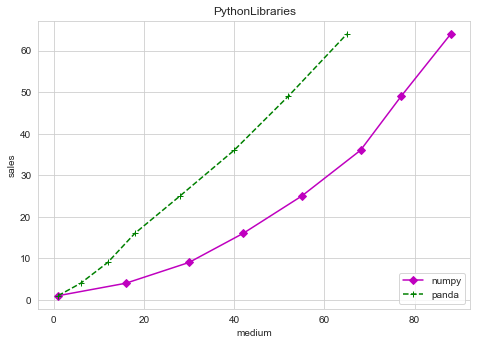

In [91]:
y = [1, 4, 9, 16, 25,36,49, 64]
x = [1, 16, 30, 42,55, 68, 77,88]
x2 = [1,6,12,18,28, 40, 52, 65]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])     #syntax= ax.legend(handles, labels, loc)  [2x2 dimension so we need x1,x2 and Y]
l1 = ax.plot(x,y,'mD-') # '-' = solid line with m=  magenta colour and D= diamond marker
l2 = ax.plot(x2,y,'g+--') # '--'= dash line with g= green colour and += plus marker
ax.legend(labels = ('numpy', 'panda'), loc = 'lower right') # legend placed at lower right
ax.set_title("PythonLibraries")
ax.set_xlabel('medium')
ax.set_ylabel('sales')
plt.show()



Q4. Display data by splitting age in 4 quartiles and labeling the quartiles.

In [92]:
from datetime import date
#calculate the dates difference to get the age
df = pd.DataFrame(data = df_PA["DateOfBirth"])
def age(birthdate):
    today = date.today()
    return today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
  
df['Age'] = df['DateOfBirth'].apply(age)
df

,DateOfBirth,Age
0,1960-01-01 00:00:00.000,62
1,1985-11-15 02:08:42.090,36
2,1976-04-15 02:52:09.762,46
3,1968-10-15 03:32:13.635,53
4,1962-05-01 19:12:58.950,60
...,...,...
940,1986-05-26 00:01:19.761,36
941,1970-06-10 21:41:03.814,52
942,1983-01-08 21:49:27.884,39
943,1963-06-05 07:57:05.569,59


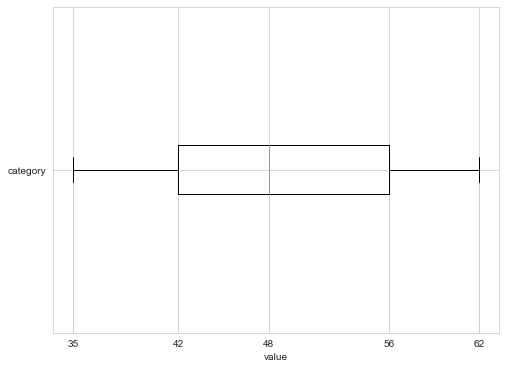

In [93]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)

ax.boxplot(df["Age"], vert=False, manage_ticks=True)
ax.set_xlabel('value')
ax.set_xticks([15])

ax.set_yticks([1])
ax.set_yticklabels(['category'])

quantiles = np.quantile(df["Age"],[0,0.25,0.5,0.75,1])
ax.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, label = 'quantiles',
          color='b', ls=':', lw=0.5, zorder=0)
ax.set_ylim(0.5, 1.5)
ax.set_xticks(quantiles)
plt.show()

In [94]:
#or

import datetime as dt
now = datetime.now()
df_PA['Age']=(now.today()\
            -pd.to_datetime(df_PA['DateOfBirth'])).astype('timedelta64[Y]')
df_PA["Age Groups"] = pd.qcut(df_PA["Age"], q=[0, .25, .5,.75, 1],labels=['Q1', 'Q2', 'Q3','Q4'])

df_PA


,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age,Age Groups
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,62.0,Q4
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,36.0,Q1
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,46.0,Q2
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,53.0,Q3
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,60.0,Q4
...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,36.0,Q1
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,52.0,Q3
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,39.0,Q1
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,59.0,Q4


Q5. Display full name of patients who are born in 1986.

In [95]:
df_temp = df_PA.set_index(["DateOfBirth"])
df1 = df_temp.loc["1986"]
df1[["FirstName", "LastName"]]

,FirstName,LastName
DateOfBirth,,
1986-05-31 09:36:05.716,Gabriel,Joseph
1986-07-24 17:36:00.791,Lincoln,Brenda
1986-11-26 10:44:22.628,Ala,Halpert
1986-01-08 02:34:04.596,Lolita,Darci
1986-05-29 00:35:58.694,Fadel,Bernardt
1986-02-11 06:22:40.734,Bentley,Kippax
1986-04-15 00:49:58.690,Vale,Olanda
1986-11-19 23:50:47.955,Britt,Dureden
1986-07-10 16:27:30.640,Cristabel,Chatel


Q6. Create a jointplot on expected mortality & expected length of stay.

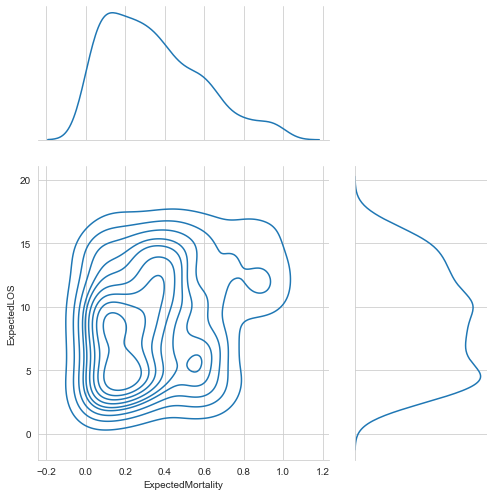

In [96]:
sns.jointplot(data=df_RR, x='ExpectedMortality',y='ExpectedLOS', kind ="kde", height = 7, ratio = 2)

7.Create a pair plot on whole dataframe by taking parameter "hue" as EDDisposition.


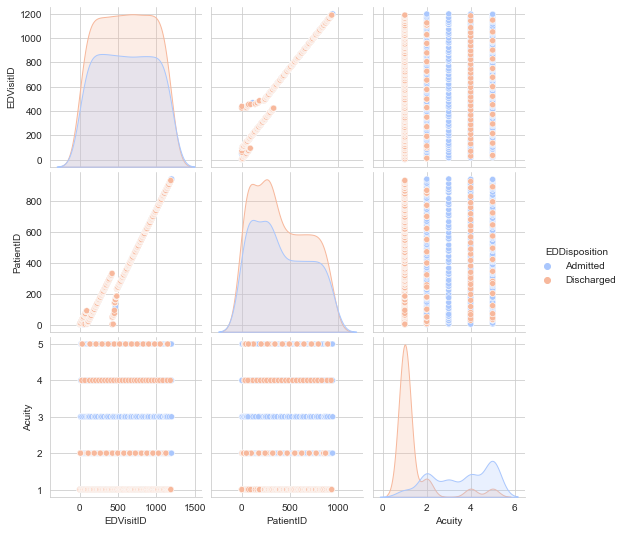

In [97]:
sns.pairplot(df_EDV, hue='EDDisposition',palette='coolwarm')

Q8. Create a bar chart between expectedLOS & Primary diagnosis.

In [98]:
x= df_RR["ExpectedLOS"]
y=df_RR["PrimaryDiagnosis"]


<BarContainer object of 720 artists>

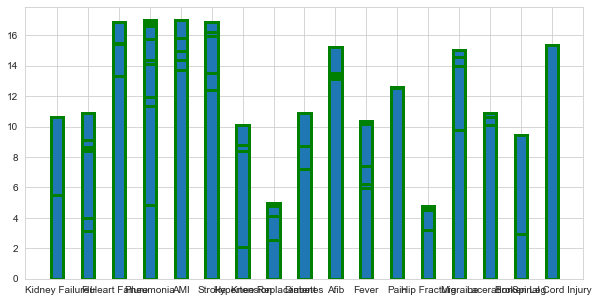

In [99]:
fig = plt.figure(figsize = (10, 5))
bar=plt.bar(y,x, width = 0.4, linewidth=3, edgecolor = "green")
bar

9	Get the list of patient ID's which are not there in ReadmissionRegistry.

In [100]:
df1 = df_PA.filter(["PatientID"],axis =1 )    #filter pateint id from pateints and rr
df2 = df_RR.filter(["PatientID"],axis =1 )
result = pd.concat([df1,df2]).drop_duplicates(keep=False)  #concat and remove duplicates
print(list(result["PatientID"]))

[4, 135, 145, 189, 200, 224, 234, 374, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 414, 501, 562, 599, 690, 691, 704, 726, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 9

10.Creating a boxplot on ExpectedLOS by taking service into account.

<AxesSubplot:xlabel='Service', ylabel='ExpectedLOS'>

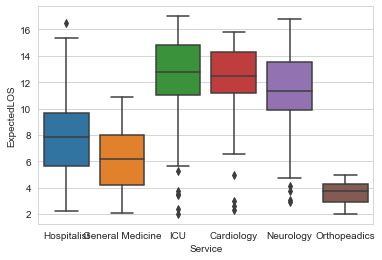

In [101]:
sns.boxplot(data=df_RR, x="Service", y="ExpectedLOS",  )

11.Create a pie chart by taking Service= ["ICU", "Neurology", "General", "Medicine"] & ExpectedLOS=[10,5,7,9] & explode the wedge with highest LOS.

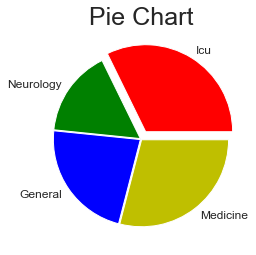

In [102]:
Service= ["Icu", "Neurology", "General", "Medicine"]
ExpectedLOS=[10,5,7,9]
outside=(0.5,0.6,0.2)
plt.pie(ExpectedLOS,labels=Service, colors=['r','g','b','y'],explode=(0.1,0.01,0.01,0.01),textprops={'fontsize': 12})
plt.title('Pie Chart',fontsize=25)
plt.show()

12	Connect to sql and write a query to get list of Provider names whose Providername is starting with letter T.

In [103]:
!pip install pandasql

In [104]:
from pandasql import sqldf 
import pandasql as ps
mysql = lambda q: sqldf(q, globals() )
Tnames  = ps.sqldf("""select ProviderName from df_P where ProviderName like 'T%'""")
Tnames

,ProviderName
0,Ted Texas
1,Ted Green
2,Ted Black
3,Tyler Conner
4,Tony Creed
5,Trent Tye


13. 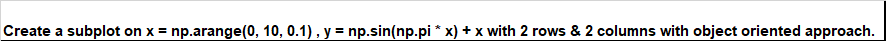

C:\Users\Divya\AppData\Local\Temp/ipykernel_21420/2454883225.py:18: RuntimeWarning: divide by zero encountered in log10
  axes[1][1].plot(x,np.log10(y),'r--o')


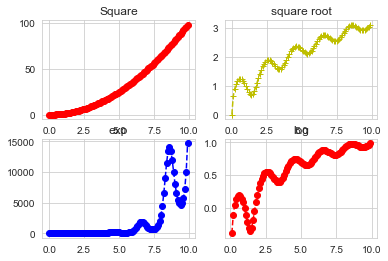

In [105]:
x = np.arange(0, 10, 0.1) 
y = np.sin(math.pi * x) + x

# creating the canvas with class 'fig'
# and it's object 'axes' with '2' row and '2' columns
fig, axes = plt.subplots(2, 2)    #syntax= Plt.subplots(nrows, ncols)
  
# plotting graph for 1st element
axes[0][0].plot(x, x*x,'r--o')         #square of x , solid line with r=  red colour and o= circlular marker
axes[0][0].set_title('Square')  
# plotting graph for 2nd element
axes[0][1].plot(x,np.sqrt(y),'y--+')
axes[0][1].set_title('square root') 
# plotting graph for 3rd element
axes[1][0].plot(x,np.exp(y) ,'b--o')
axes[1][0].set_title('exp')  
# plotting graph for 4th element
axes[1][1].plot(x,np.log10(y),'r--o')
axes[1][1].set_title('log')
plt.show()








14.Find the number of null values in BloodPressureSystolic column.


In [106]:
df_AV.BloodPressureSystolic.isnull().sum()

124

15.Replace all the null values in ReadmissionFlag with 0.


In [107]:
df_RR['ReadmissionFlag'] = df_RR['ReadmissionFlag'].fillna(0)
df_RR

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,0.0,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,0.0,NaN,NaN
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,0.0,NaN,NaN
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,0.0,NaN,NaN
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,0.0,NaN,NaN


In [108]:
df_RR['ReadmissionFlag'].isnull().sum()

0

Q16. Plot a graph to show the distribution of expected length of stay.

C:\Users\Divya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ExpectedLOS'>

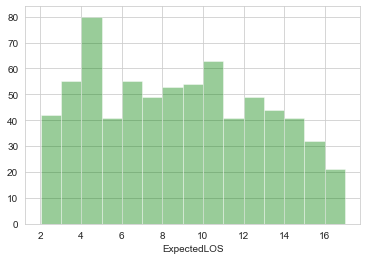

In [109]:
sns.set_style('whitegrid')
sns.distplot(df_RR['ExpectedLOS'],kde=False, color='green', bins=15)

distribution shows the maximum occurances is between 4 to 5 and then 10 to 11.

Q17. Create a heat map to show the correlation between the column values of Edvisits.

In [110]:
tc=df_EDV.corr(method='pearson')
tc

,EDVisitID,PatientID,Acuity
EDVisitID,1.000000,0.975477,0.005813
PatientID,0.975477,1.000000,0.003545
Acuity,0.005813,0.003545,1.000000


<AxesSubplot:>

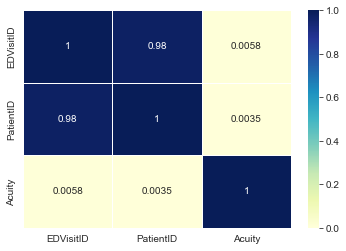

In [111]:
sns.heatmap(tc,annot=True,vmin=0, vmax=1, cmap="YlGnBu", linewidths=.5)

Q18. Add column 'Age' in Patient table.

In [112]:
from datetime import date
df = pd.DataFrame(data = df_PA["DateOfBirth"])
def age(birthdate):
    today = date.today()
    return today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
  
df_PA['Age'] = df_PA['DateOfBirth'].apply(age)
df_PA

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age,Age Groups
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,62,Q4
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,36,Q1
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,46,Q2
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,53,Q3
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,60,Q4
...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,36,Q1
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,52,Q3
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,39,Q1
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,59,Q4


Q19. Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet.

In [113]:
df_datetime = pd.DataFrame(data={}, columns=['date', 'time'])
df_datetime

,date,time


In [114]:
df_datetime['date'] = pd.to_datetime(df_RR['DischargeDate']).dt.date
df_datetime['time'] = pd.to_datetime(df_RR['DischargeDate']).dt.time

In [115]:
df_datetime

,date,time
0,2018-01-04,19:59:31.391000
1,2018-01-04,21:28:51.898000
2,2018-01-04,22:28:23.672000
3,2018-01-05,05:47:04.933000
4,2018-01-05,14:18:30.029000
...,...,...
715,2018-03-07,21:22:10.061000
716,2018-03-08,02:43:18.749000
717,2018-03-08,09:27:18.377000
718,2018-03-10,06:06:12.068000


Q20. Count of number of patients admitted based on Primary Diagnosis and Service provided.

In [116]:
df_RR.groupby(["Service", "PrimaryDiagnosis"]).count()["PatientID"]

Service           PrimaryDiagnosis  
Cardiology        AMI                   40
                  Afib                  10
                  Broken Leg             3
                  Flu                    2
                  Heart Failure         39
                  Kidney Failure         1
General Medicine  Broken Leg             3
                  Diabetes              38
                  Fever                 13
                  Flu                   54
                  Hypertension          35
                  Kidney Failure        12
                  Laceration            21
                  Pneumonia             67
                  Stroke                20
Hospitalist       AMI                    1
                  Broken Leg             3
                  Diabetes              26
                  Fever                  3
                  Flu                   19
                  Hypertension           6
                  Kidney Failure         6
                 

21	Which demographic patients are prone to get stroke.

In [117]:
df = pd.merge(df_PA, df_RR,how='inner',on=["PatientID"])   
a = df[df["PrimaryDiagnosis"] == "Stroke"]
a.groupby(['Race','Gender','Language'])[['PatientID']].count().idxmax()

PatientID    (Black/African-American, Male, English)
dtype: object

22. Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value.

In [118]:
df_temp = df_EDV.groupby(["EDDisposition","Acuity"]).count()["PatientID"]
pd.DataFrame(data = df_temp)

PatientID
EDDisposition Acuity           
Admitted      1              32
              2             116
              3              81
              4             107
              5             179
Discharged    1             558
              2              66
              4              30
              5              30

23. write a function to find the center element in the list. (one element in odd length list, two elements in even length list).

In [119]:
input_list1=[2,7,4,4,2,7,8,9,0]
input_list2=[2,7,4,4,2,7,8,9]
def findcenter(input_list):
    center_element= float(len(input_list))/2
    if center_element % 2 != 0:
        return input_list[int(center_element - .5)]
    else:
        return (input_list[int(center_element)], input_list[int(center_element-1)])
center1=findcenter(input_list1)
print(center1)
center2=findcenter(input_list2)
print(center2)

2
(2, 4)


24.Get the number of patients based on ReasonForVisit and EDDisposition (use stack/unstack functions).

In [120]:
df_patients=dfEDU.groupby(['ReasonForVisit','EDDisposition']).count().unstack()
df_patients['PatientID']

EDDisposition,Admitted,Discharged,admitted,discharged
ReasonForVisit,,,,
Accident,NaN,NaN,37.0,NaN
Bleeding,14.0,11.0,NaN,NaN
Car Accident,15.0,NaN,1.0,NaN
Chest Pain,66.0,NaN,14.0,11.0
Fever,NaN,88.0,40.0,44.0
Gun Shot,NaN,NaN,16.0,NaN
Intoxication,NaN,NaN,NaN,23.0
Laceration,NaN,22.0,NaN,NaN
Migraine,26.0,31.0,15.0,44.0


25.Plot a graph by counting the no. of patients in each department.


<AxesSubplot:title={'center':'No. of Patients in each  Department'}, xlabel='VisitDepartmentID', ylabel='Count of patients'>

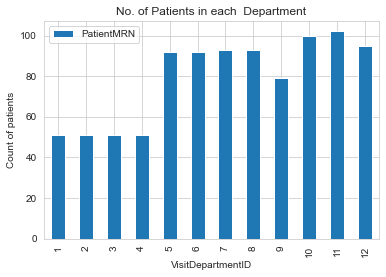

In [121]:
df_AV.groupby(['VisitDepartmentID'])[['PatientMRN']].count().plot(kind='bar',ylabel='Count of patients',title="No. of Patients in each  Department")

26.Using arrays and loops, find the count of patients based on gender.


In [122]:
GFemale = 0
GMale = 0

for i, row in df_PA.iterrows():  #i: dataframe index; row: each row in series format
    if row['Gender']=="Female":
         GFemale = GFemale+1
    elif row['Gender']=="Male":
          GMale = GMale+1

print("Female :: ",GFemale) 
print("Male  ::  ",GMale)
    

Female ::  408
Male  ::   537


27.Plot a graph to count the patients based on discharge disposition.


<AxesSubplot:title={'center':'Discharge Disposition'}, xlabel='DischargeDisposition', ylabel='Count of Patients'>

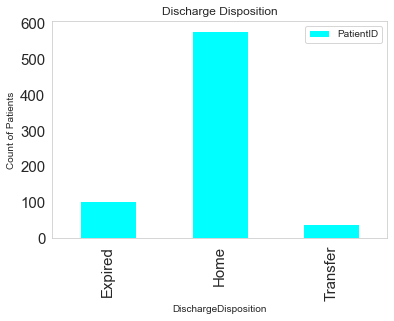

In [123]:
df=df_D.groupby(['DischargeDisposition'])[['PatientID']].count()
df.plot(kind='bar',title='Discharge Disposition',ylabel='Count of Patients',color={'cyan'},fontsize=15,grid=False)

Q28. Which reason of visit has maximum mortality rate.

In [124]:
result = df_EDV.merge(df_RR, how = "outer")
result

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition,AdmissionID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,1,1,2020-01-01 00:00:00.000,2020-01-01 11:20:22.924,1,Stomach Ache,Admitted,389.0,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,0.0,NaN,NaN
1,46,1,2020-01-01 11:55:53.030,2020-01-01 12:04:19.052,2,Shortness of Breath,Admitted,389.0,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,0.0,NaN,NaN
2,424,1,2020-01-06 03:40:15.839,2020-01-06 06:49:06.997,1,Stomach Ache,Discharged,389.0,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,0.0,NaN,NaN
3,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted,568.0,2018-01-01,2018-01-09 09:21:47.300,Home,Hospitalist,Pneumonia,7.162811,0.671473,1.0,5.0,1.0
4,103,12,2020-01-02 02:29:50.908,2020-01-02 02:34:11.803,1,Migraine,Discharged,568.0,2018-01-01,2018-01-09 09:21:47.300,Home,Hospitalist,Pneumonia,7.162811,0.671473,1.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,1183,929,2020-01-15 10:38:42.570,2020-01-16 02:31:52.023,4,Chest Pain,Discharged,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1223,1186,932,2020-01-15 11:52:37.540,2020-01-16 10:19:41.570,1,Pneumonia,Discharged,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1224,1187,933,2020-01-15 12:11:11.678,2020-01-15 16:41:15.223,1,Pneumonia,Discharged,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1225,1188,934,2020-01-15 12:21:46.006,2020-01-15 18:32:21.060,1,Pneumonia,Discharged,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
i = result["ExpectedMortality"].idxmax()
result.iloc[i]["ReasonForVisit"]

'Pneumonia'

Q29. Calculate average LOS.

In [126]:
df_RR["ExpectedLOS"].mean()

8.824589159156156

Q30. Which patient id has most entries in readmission registry.

The efficient solution is using the value_counts()

In [127]:
#optimal solution using value_counts
i = (df_RR["PatientID"].value_counts()).idxmax()
res = df_RR.iloc[i]
res["PatientID"]

22

In [128]:
#other solution using groupby
idx = (df_RR.groupby(["PatientID"]).size()).idxmax()
res1 = df_RR.iloc[idx]
res1["PatientID"]

22

Q31. Find the count of White Spanish Male.

In [129]:
df_PA[(df_PA['Gender']=='Male') & (df_PA['Race']=='White') & (df_PA['Language']=='Spanish') ]

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age,Age Groups
10,11,Dean,Kimberly,1972-02-22 19:23:49.981,Male,White,Spanish,50,Q3
11,12,Zonnya,Ab,1963-05-23 10:04:33.074,Male,White,Spanish,59,Q4
12,13,Skippie,Marriot,1978-05-12 20:12:54.106,Male,White,Spanish,44,Q2
13,14,Gan,Yu,1970-06-02 06:22:54.675,Male,White,Spanish,52,Q3
14,15,Gabriel,Saint,1961-11-18 06:47:20.682,Male,White,Spanish,60,Q4
15,16,Far,Pardon,1974-08-08 10:55:59.043,Male,White,Spanish,48,Q2
16,17,Gerhold,Kendall,1974-02-15 22:02:36.479,Male,White,Spanish,48,Q2
17,18,Sheena,Kevin,1983-01-20 20:40:26.024,Male,White,Spanish,39,Q1
18,19,Daugherty,Conner,1960-04-04 10:00:34.189,Male,White,Spanish,62,Q4
19,20,Megan,Walter,1960-02-10 19:04:57.032,Male,White,Spanish,62,Q4


Q32. Write a function to print the multipication table of the given number.

In [130]:
def mult_table(num):
    for i in range(1,11):
        print(i * num, end = '\t')

user_num = int(input("enter the number:  "))        
mult_table(user_num)

enter the number:  123
123	246	369	492	615	738	861	984	1107	1230	

In [131]:
Q33. Using a bar chart, which Service had the lowest count of Expected Mortality?

Object `Mortality` not found.


In [ ]:
Q33. Using a bar chart, which Service had the lowest count of Expected Mortality

In [132]:
x = df_D["Service"]
y = df_D["ExpectedMortality"]

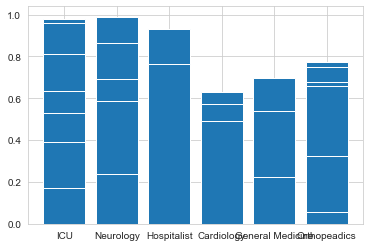

In [133]:
bar = plt.bar(x,y)

from the figure it shows that Cardiology has the least expectedmortality rate

34. np.arange(1,31).reshape(6,5), find array slicing for elements 2,8,14,20.

In [134]:
b=np.arange(1,31).reshape(6,5)
c=b[0:4,1:5]
c.diagonal()

array([ 2,  8, 14, 20])

35. np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17.

In [135]:
a=np.arange(1,31).reshape(6,5)
a[2:4,0:2]

array([[11, 12],
       [16, 17]])

36.Create a correlation matrix on EDVisits.

In [136]:
corrMatrix = df_EDV.corr()
print (corrMatrix)

           EDVisitID  PatientID    Acuity
EDVisitID   1.000000   0.975477  0.005813
PatientID   0.975477   1.000000  0.003545
Acuity      0.005813   0.003545  1.000000


37.Write a function to print all the upper case letter of a given sentence.


In [ ]:
# take input
string = input('Enter any string: ')
upper = ''
for char in string:
    #check uppercase characters
    if char.isupper():
        upper += char

# print uppercase characters
print('Uppercase characters:', upper)

38.Number of patients on 'Transfer' based on primary diagnosis.


In [ ]:
Transfer = (df_RR[(df_RR['DischargeDisposition']=='Transfer')]).groupby(["PrimaryDiagnosis"])[["AdmissionID"]].count()
Transfer

39.Get the FirstName, LastName, DateOfBirth of the Patients whose reason for visit is Migraine. Use EDUnique Sheet for reason for visit.


In [ ]:
     #SYNTAX = pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,left_index=False, right_index=False, sort=True)
#joining the sheets using merge function 
MigraneVisit = pd.merge(df_PA,df_EDV,how="inner", on="PatientID",sort=True)    #Inner join = Use intersection of keys
#Filter out the columns needed in MigraneVisit
(MigraneVisit[(MigraneVisit['ReasonForVisit']=='Migraine')]).loc[:,['FirstName','LastName','DateOfBirth','ReasonForVisit']]

Q40. Plot a graph showing the count of patients for the reason visited the hospotal.

In [ ]:
reasonOfVisit_count = df_EDV.groupby("ReasonForVisit").count()[["PatientID"]]
reasonOfVisit_count

In [ ]:
reasonOfVisit_count.plot(kind='bar', figsize = (11, 8), ylabel = "count of PatientID", )
plt.show()

41	Find the visit type with maximum 'No Show'.

In [ ]:
show=df_AV[df_AV.VisitStatus == 'No Show']   #filterout no show from visit status
show

In [ ]:
show.groupby(['VisitType'])[['VisitType']].count().idxmax()   #grouping visit type  with max  noshow using idxmax() 

Q42. Using loc , get the details of the providers where providerId is between 11 and 20 and ProviderSpecialty is Surgery.

In [ ]:
df_P_temp = df_P.set_index('ProviderID') 
(df_P_temp.loc[df_P_temp['ProviderSpecialty']== "Surgery",'ProviderName']).loc[11:20]

43.Write a regular expression to find all the digits and numbers in the string.

In [ ]:
# Function to extract all the numbers from the given string
def getNumbers(str):
    array = re.findall(r'[0-9]+', str)
    return array
 
# Driver code
str = "adbv345hj43hvb42"
array = getNumbers(str)
print(*array)

44	Create a pivot table displaying average LOS based on Service and Primary Diagnosis.

In [ ]:
df_RR["LOS"]= df_RR['DischargeDate'].dt.date - df_RR['AdmissionDate'].dt.date
df_RR.pivot_table(index=['Service','PrimaryDiagnosis'], values=['LOS'],aggfunc='mean')


45.Calculate mortality by diagnosis.

In [ ]:
#count of mortality 
Mortality_Diag = df_RR[df_RR["DischargeDisposition"]=="Expired"]
Mortality_Diag.groupby(["DischargeDisposition","PrimaryDiagnosis"])["PatientID"].count()

46. Write a code to split a sentence into words using regex.

In [ ]:
string = "python hackathon september2022"
re.split("(?:(?:[^a-zA-Z]+')|(?:'[^a-zA-Z]+))|(?:[^a-zA-Z']+)", string)

47.Using indexing , loc to retrieve the row with maximum BloodPressureSystolic.

In [ ]:
#Using indexing , loc to retrieve the row with maximum BloodPressureSystolic.
max_bp = df_AV["BloodPressureSystolic"].max()
max_bp = df_AV.loc[(df_AV["BloodPressureSystolic"]==190)]
max_bp

48. Display the average LOS based on Service and Discharge Disposition(Maintain the column Hierarchy).

In [ ]:
dfD_avg=df_D.groupby(['Service','DischargeDisposition']).mean()['ExpectedLOS']
dfD_avg

49.Retrieve the rows where SBP<140 and DBP<80.


In [ ]:
df_AV = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "AmbulatoryVisits")
SBP=df_AV['BloodPressureSystolic']<140
DBP=df_AV['BloodPressureDiastolic']<80 
df_AV.loc[SBP & DBP]


50.Which departmentID has maximum number of visits scheduled.


In [ ]:
df_AV.groupby(['VisitDepartmentID'])[['VisitID']].count().idxmax()

51.Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.


In [ ]:
df_EDV[(df_EDV["ReasonForVisit"].isin(["Migraine", "Pneumonia"])) & (df_EDV["Acuity"] >= 2)]   #using in function instead of or 

Q52. Retrieve the row with minimum DBP using sorting technique.

In [ ]:
r= df_AV.sort_values(by="BloodPressureDiastolic", ascending=True)
r

In [ ]:
r.iloc[0]

Q53. Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit.

In [ ]:
#the number of patients admitted to each ReasonForVisit are as follows
(df_EDV.groupby(["ReasonForVisit"])).count()["PatientID"]

In [ ]:
#prompt the user the list to select from
ReasonForVisit_List = ['Accident', 'Bleeding', 'Car Accident', 'Chest Pain', 'Cough', 'Fever', 'Gun Shot', 'Intoxication', 'Laceration', 'Migraine', 'Pneumonia', 'Shortness of Breath', 'Stomach Ache']
for i in ReasonForVisit_List:
    print(i)

In [ ]:
#get a user input
user_input =input("Enter the ReasonForVisit from the list.  ")
user_input

In [ ]:
if user_input in ReasonForVisit_List:
    patient_count = (df_EDV.groupby(["ReasonForVisit"])).count()["PatientID"].loc[user_input]
    print(f"the number of patients admitted to {user_input} are {patient_count} ")
else :
    print("wrong value")   

Q54. Mortality O.E.

In [ ]:
df_RR["DischargeDisposition"].value_counts()

In [ ]:
ObeservedMortality = df_RR["DischargeDisposition"].value_counts()['Expired']
ObeservedMortality

In [ ]:
ExpectedMortality = df_RR["ExpectedMortality"].count()
ExpectedMortality

In [ ]:
Mortality_O_E = ObeservedMortality / ExpectedMortality
Mortality_O_E

55	Create a bar chart on service & expected length of stay.

In [ ]:
fig = plt.figure(figsize = (10, 3))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_D["Service"],df_D["ExpectedLOS"],color='cyan',width=0.3)
plt.xlabel("Service")
plt.ylabel("ExpectedLOS")
plt.title("Bar Chart : Service & Expected Length of Stay")
plt.xticks(rotation = 'horizontal')
plt.show()

56.Count of canceled status.

In [ ]:
dfAV_canceled=df_AV.loc[(df_AV['VisitStatus']=='Canceled')]
dfAV_canceled['VisitStatus'].count()

57.Find the age prone to get stroke.


In [ ]:
Patients =df_PA
now = datetime.now()
Patients["Age"] =(now - Patients['DateOfBirth'])/np.timedelta64(1,'Y')
Patients.head()

In [ ]:
df_Stroke = pd.merge(df_RR,df_PA,how="inner",on="PatientID",sort=True)
a=df_Stroke[(df_Stroke["PrimaryDiagnosis"] == "Stroke")].groupby(["Age"])["AdmissionID"].count().idxmax()
a

58. Display total count of patients service wise based on gender.

In [ ]:
df_result=pd.concat([df_PA,df_RR],axis=1)
df_result.groupby(['Gender','Service']).count()['PatientID']

59. Create a dataframe by splitting provider name to firstname and lastname with names for the columns.

In [ ]:
df_P_name=df_P[['ProviderName']]
df_P_name[['Firstname','Lastname']] = df_P_name.ProviderName.str.split(expand=True)
df_P_name

60.Find the list of patients whose ExpectedLOS is greater than the value given by the user.

In [ ]:
Los=7
display(df_D[(df_D['ExpectedLOS']>Los)][['PatientID']])

61.Plot a graph by multiplotting on the same canvas  (Take any set of x & y values).


In [ ]:
df = pd.DataFrame({'x': [1, 2, 3], 'y': [7, 4, 2]})     #syntax= DataFrame.plot(*args, **kwargs)[source]
df.plot(kind='density')

62.Display the data for all 'White Female' patients above the age of 50.


In [ ]:
now = pd.Timestamp('now')
#extract age from Date of birth = current date- date of birth
df_PA['age'] = (now - df_PA['DateOfBirth'])/np.timedelta64(1,'Y') 
df_PA.sort_values("age")
df_PA.sort_values("age",ascending=True)
#Filtering out the columns 
WhiteFemale=df_PA[(df_PA['Gender']=='Female')&(df_PA['Race']=='White') & (df_PA['age']>50)]
WhiteFemale



63.Using loc, retrieve the firstname and lastname of patients between indices 101 and 200.

In [ ]:
Name=df_PA.loc[101:200,"FirstName":"LastName"]
Name

Q64. "Using numpy functions, multiply the following arrays a=np.arange(6).reshape(2,3) b=np.arange(6).reshape(3,2)"

In [ ]:
a=np.arange(6).reshape(2,3)
b=np.arange(6).reshape(3,2)
a

In [ ]:
b

In [ ]:
np.dot(a,b)

Q65. Get the number of patients based on service and primary diagnosis.

In [ ]:
df_RR.groupby(["Service", "PrimaryDiagnosis"]).count()["PatientID"]

Q66. np.arange(1,31).reshape(6,5), find array slicing to get the elements 4,5,24,25,29,30.

In [ ]:
array1 = np.arange(1,31).reshape(6,5)
array1

In [ ]:
array1[[0,4,5], 3:5]

67.Make a pivot table by the no. of patients from the admission date till discharge date.

In [ ]:
df_RR['Discharge'] = df_RR['DischargeDate'].dt.date   #storing the count of  number of patients in the new discharge column
pivot = df_RR.pivot_table(index=['AdmissionDate','Discharge'],values=['PatientID'], aggfunc='count')
pivot

68.Display the data where actual LOS is greater than expected LOS.

In [ ]:
df_RR['ActualLOS'] = (df_RR['DischargeDate'] - df_RR['AdmissionDate'])/np.timedelta64(1,'D')

df_RR.loc[df_RR['ActualLOS'] >df_RR['ExpectedLOS']]


69.Details of the patients whose firstname or lastname contains string "lau" , should be case insensitive.


In [ ]:
df_PA['FullName']= df_PA['FirstName'] + df_PA['LastName']
df=df_PA[df_PA['FullName'].str.contains('lau',case=False,regex=True)]  
print(df)

70 Plot a graph to show the distribution of expected mortality.

In [ ]:
ax = sns.distplot(df_D['ExpectedMortality'],
                  bins=50,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
 
plt.show()

71 Create a visualization on the count of patients based on primary diagnosis.

In [ ]:
df5_pd=df_D.groupby(['PrimaryDiagnosis']).count()['PatientID'].plot(kind='bar',ylabel='No of patients',title="Count of patients based on primary diagnosis")
df5_pd

72	List male patients over the age of 60 who have undergone surgery from January-March 2019.

In [ ]:
import datetime as dt
df_PA['Age']=(dt.datetime.today()\
            -pd.to_datetime(df_PA['DateOfBirth'])).astype('timedelta64[Y]')


df_AV["DateofVisitMonth"] = pd.DatetimeIndex(df_AV["DateofVisit"]).month   #extract month of visit
df_AV["DateofVisitYear"] = pd.DatetimeIndex(df_AV["DateofVisit"]).year      #extract year of vist

df_surgery = (df_P[(df_P['ProviderSpecialty']=='Surgery')])     #patients undergone surgery
df_60male = (df_PA[(df_PA['Age']==60) & (df_PA['Gender']=='Male')])   #patients above 60 and gender is male

Jan-Mar = (df_AV[(df_AV['DateofVisitYear']==2019) & (df_AV['DateofVisitMonth'].isin([1,2,3]))])   #visited in between jan to mar in 2019

D2 = pd.merge(Jan-Mar, df_surgery,how="inner",on="ProviderID",sort=True)

D3 = pd.merge(D2,dfpa_60male,how="inner",left_on="PatientMRN",right_on="PatientID",sort=True)

print(D3[["PatientID", "FirstName", "LastName", "Age","Gender", "DateofVisitYear", "DateofVisitMonth" ]])

73.Delete the column 'DischargeDispostion' iteratively.


In [ ]:
df = df_RR  #temp storing df_RR in df
column = df.columns.tolist()  #adding columns to list 
for i in column :                                
    if i == "DischargeDisposition" :df.pop(i)
df




74.Get the list of ReasonForVisit.


In [ ]:
df_EDV.ReasonForVisit.unique()

75	Calculate the time spent in ED Department for each visit.

In [ ]:
df_EDV['VisitDate'] = pd.to_datetime(df_EDV['VisitDate'])     # Pandas to_datetime() method helps to convert string Date time into Python Date time object.
df_EDV['EDDischargeTime'] = pd.to_datetime(df_EDV['EDDischargeTime'])
Timespent = (df_EDV['EDDischargeTime'] - df_EDV['VisitDate'])
Timespent

Q76. Reverse the string without using inbuilt functions.

In [ ]:
def reverse_string(s):
    return s[::-1]

input_str = 'ABCDEF'
reverse_string(input_str)


77	Create a bar chart by making list on Acuity & EDDisposition column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method.

In [ ]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True   #set the size store the columns in  a 
a=df_EDV["Acuity"]
b=df_EDV["EDDisposition"]
#   Types of hatches
hatches =["*", "/", "o", "x", "//"]
#barplot
bar = sns.barplot(x=a, y=b,color="g",palette="magma",saturation=.3);

# Loop over the bars to make hatches
for i,thisbar in enumerate(bar.patches):thisbar.set_hatch(hatches[i])    #to set each bar differnt hatch set_hatch()
plt.show()

78 .Find reasonForVisit with highest count of acuity 5 patients.

In [ ]:
df_hcp=df_EDV.loc[(df_EDV['Acuity']== 5)]
df_hcp
max_hcp =df_hcp["ReasonForVisit"].max()
max_hcp

79.Which PrimaryDiagnosis has the biggest difference between maximum and minimum Expected LOS?


In [ ]:

#use groupby to find the max and min differnce of 2 columns 
Diff=df_RR.groupby('PrimaryDiagnosis')['ExpectedLOS'].agg(np.ptp)
#dataframe.idxmax() function returns index of first occurrence of maximum over requested axis
print(Diff.idxmax(axis=0), '-', Diff.max())


80.Write a code snippet to print different ProviderSpecialty ( use groupby and get the list of the groups).


In [ ]:
PS = df_P.groupby(['ProviderSpecialty'])
for name,group in PS :
    print(name)
    print(group)